## Customer Churn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv")

In [4]:
df.shape

(3333, 21)

In [5]:
df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


## Exploratory Data

In [6]:
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
#So most of the customers did not churn

In [8]:
df.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

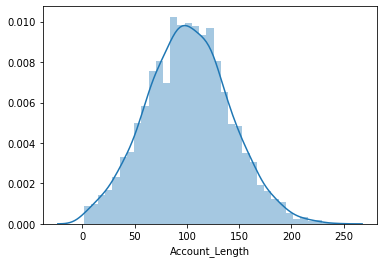

In [9]:
#Exploring distribution.

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df["Account_Length"])

In [10]:
# Let's see the differences in Account Length of Churners vs. Non

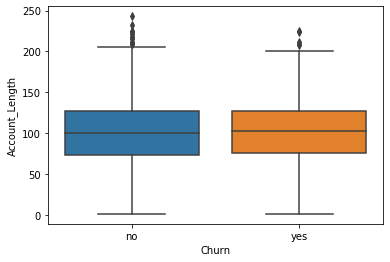

In [11]:
sns.boxplot(x="Churn",y="Account_Length",data=df)
plt.show()

In [12]:
#No significant difference in account length between churners and non

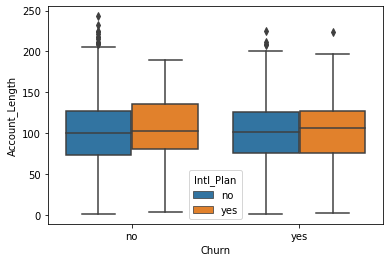

In [13]:
sns.boxplot(x="Churn",y = "Account_Length",data=df,hue="Intl_Plan")
plt.show()

In [14]:
#This type of information is very useful to determine the DRIVERS of
#Churn

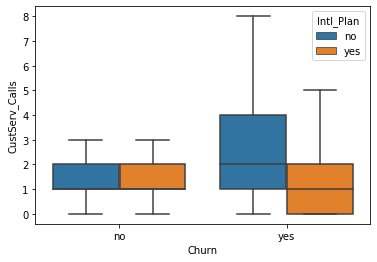

In [15]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",  #Removes the outliers
            hue = "Intl_Plan")
plt.show()

# Data Preparation

In [16]:
#Many ML Models make certain assumptions about how your model is 
#distributed. If your distribution does not meet these requirements
#then your model will not be  reliable

In [17]:
df["Intl_Plan"].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [18]:
#To accomodate for an ML model we are going to change "yes" and "no"
#to 1 and 0

df["Intl_Plan"]=df["Intl_Plan"].replace({"no":0,"yes":1})

In [19]:
df["Intl_Plan"].value_counts()

0    3010
1     323
Name: Intl_Plan, dtype: int64

In [20]:
df["Vmail_Plan"]=df["Vmail_Plan"].replace({"no":0,"yes":1})

In [21]:
df["Vmail_Plan"].value_counts()

0    2411
1     922
Name: Vmail_Plan, dtype: int64

In [22]:
#One hot encoding- Get dummies for States (because there are too many 
#values in states)
df_state = pd.get_dummies(df["State"])

In [23]:
df_state

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Now we need to STANDARDIZE certain variables

In [25]:
from sklearn.preprocessing import StandardScaler
df["Intl_Calls"].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl_Calls, dtype: float64

In [26]:
df["Night_Mins"].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64

In [27]:
df_lim = df.filter(["Intl_Calls","Night_Mins"],axis=1)

In [28]:
df_lim

,Intl_Calls,Night_Mins
0,3,244.7
1,3,254.4
2,5,162.6
3,7,196.9
4,3,186.9
...,...,...
3328,6,279.1
3329,4,191.3
3330,6,191.9
3331,10,139.2


In [29]:
df_lim_scaled= StandardScaler().fit_transform(df_lim)

In [30]:
df_lim_scaled

array([[-0.60119509,  0.86674322],
       [-0.60119509,  1.05857074],
       [ 0.21153386, -0.75686906],
       ...,
       [ 0.61789834, -0.1774313 ],
       [ 2.24335625, -1.21962822],
       [-0.19483061,  0.80148231]])

In [31]:
df_lim_scaled2 = pd.DataFrame(df_lim_scaled,columns=["Intl_Calls","Night_Mins"])

In [32]:
df_lim_scaled2 #Now it is standardized

,Intl_Calls,Night_Mins
0,-0.601195,0.866743
1,-0.601195,1.058571
2,0.211534,-0.756869
3,1.024263,-0.078551
4,-0.601195,-0.276311
...,...,...
3328,0.617898,1.547039
3329,-0.194831,-0.189297
3330,0.617898,-0.177431
3331,2.243356,-1.219628


In [33]:
print(df_lim_scaled2.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


# FEATURE ENGINEERING

In [34]:
# STEPS
#1. DROP UNNECESARRY FEATURES
#2. CREATE NEW FEATURES TO HELP IMPROVE MODEL PERFORMANCE
#3. CONSULT WITH BUSINESS AND SUBJECT MATTER EXPERTS ON KEY VARIABLEES

In [35]:
df.corr() #The corr method allows you to see a correlation matrix of
#your entire dataset

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,-0.011086,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646


In [36]:
#You can remove features that are highly correlated with other features
#since they are redundant and could create noise in your model.
#FEATURE SELECTION is very important since it helps you narrow down
#the features you need for your ML model

In [37]:
df = df.drop(["Area_Code","Phone"],axis=1)
#We drop Unique identifiers such as AreaCode and Phone because they do
#not provide any predictive power

In [38]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State
0,128,25,265.1,197.4,244.7,10.0,1,no,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS
1,107,26,161.6,195.5,254.4,13.7,1,no,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH
2,137,0,243.4,121.2,162.6,12.2,0,no,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ
3,84,0,299.4,61.9,196.9,6.6,2,no,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH
4,75,0,166.7,148.3,186.9,10.1,3,no,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK


In [39]:
# "Coming up with features is difficult, time-consuming, 
#requires expert knowledge. "Applied machine learning" 
#is basically feature engineering." - Andrew Ng

In [40]:
df["Average_Night_Calls"]= df["Night_Mins"]/df["Night_Calls"]

In [41]:
df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Average_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,no,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,no,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,no,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,no,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,no,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,0,1,77,26.55,126,18.32,83,12.56,6,2.67,AZ,3.362651
3329,68,0,231.1,153.4,191.3,9.6,3,no,0,0,57,39.29,55,13.04,123,8.61,4,2.59,WV,1.555285
3330,28,0,180.8,288.8,191.9,14.1,2,no,0,0,109,30.74,58,24.55,91,8.64,6,3.81,RI,2.108791
3331,184,0,213.8,159.6,139.2,5.0,2,no,1,0,105,36.35,84,13.57,137,6.26,10,1.35,CT,1.016058


# MAKING THE PREDICTIONS

In [42]:
#GOAL: To predict whether a customer will churn or not
#We have a clearly defined target variable: "Churn"
#So now we can use some Supervised ML techniques

In [43]:
#The historical data will be used as the TRAINED data

### Which model do we use? It depends. We need to experiment

In [44]:
# Logistic Regression: Offers simplicity and interpretability
# However it cannot capture more complex relationships

In [45]:
#We will try a Support Vector Classifier

In [46]:
from sklearn.svm import SVC

In [47]:
df.columns.values

array(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'State', 'Average_Night_Calls'], dtype=object)

In [48]:
features= ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'Average_Night_Calls']

In [49]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(df[features], df['Churn'])

/Users/samirbhojwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Training and Test Sets

In [50]:
#Fit your classifier to the training set
#make 

data= ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins',
       'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan',
       'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge',
       'Average_Night_Calls']

In [51]:
target=["Churn"]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[data], df[target],
                                                   test_size=0.2,random_state=42)

from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)
svc.predict(X_test)

/Users/samirbhojwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'n

## Evaluating your Model

In [53]:
# You need to be able to compute your model's accuracy
# We want to make sure our model is working well before we deploy it
# of course

In [54]:
#Fit your classifier to the training set, make predictions using the
#test set.

In [55]:
svc.score(X_test, y_test)

0.848575712143928

In [56]:
#The accuracy of this model is quite good!

In [57]:
len(X_test)

667

## Model Metrics

In [58]:
#In practice, many datasets that you encounter will tend to have
#Imbalanced classes. That is, more data points that belong to one class
#than the other.

In [59]:
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [60]:
#As you can see there are 6 times as many churners than non in our
#dataset. This impacts your model since it may always predict the 
#majority class as the best way to succeed!! (As it did above :)

In [61]:
#So Remember: WHEN WORKING WITH IMBALANCED CLASSES, ACCURACY IS NOT A 
#VERY USEFUL METRIC!! It may create many false positives and negatives

In [62]:
# PRECISION = TRUE POSITIVES / (TRUE POSITIVES + FALSE POSITIVES)
# High precision means not many false positives and the Churners that
# were identified were the ones that were.

In [63]:
# RECALL/SENSITIVITY = TRUE POSITIVES/ (TRUE POSITIVES + FALSE NEGATIVES)
#High Recall indicates that it correctly classified most churners

In [64]:
#The metric you focus on optimizing often depends on the business case

In [65]:
#This is known as a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [66]:
# The ROC curve allows you to see the performance of your classifier.

In [67]:
# The Y-axis is the True Positive rate, and the X-axis is the False
# Positive rate

In [68]:
from sklearn.metrics import roc_curve

In [69]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
#False positive rate and True Positive rate

NameError: name 'y_pred_prob' is not defined

# Model Tuning

In [75]:
svc = SVC()
svc.fit(df[features],df["Churn"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
#The above output are called Hyperparameters: They are set before the
#model is trained and informs how the model trains the data

In [77]:
#Each ML Model has its own specific hyperparameters

In [78]:
#Thus far we have used default hyperparameters. Now we are going to
#learn to tune them

In [79]:
#To optimize our hyperparameters we can use GridSearch

In [80]:
from sklearn.model_selection import GridSearchCV

In [83]:
import numpy as np
#A random forest is an ensemble of many decision trees. 
#The n_estimators hyperparameter controls the number of trees 
#to use in the forest,
param_grid = {"n_estimators":np.arange(10,51)} #n_estimator is a hyperparameter
#and also, 10-51 are the values that we want the gridsearch to tune over

In [86]:
clf_cv = GridSearchCV(RandomForestClassifier(),param_grid)

NameError: name 'RandomForestClassifier' is not defined

In [87]:
#The grid search will give you the optimum number and the best score with
#this parameter

#The goal of grid search cross-validation is to identify those 
#hyperparameters that lead to optimal model performance

In [90]:
#The power of GridSearchCV really comes into play when 
#you're tuning multiple hyperparameters, as then the algorithm 
#tries out all possible combinations of hyperparameters to 
#identify the best combination. 

### Feature Importances

In [93]:
#Feature importances respresent how much each feature contributes to
#a prediction. This informs which features are important in driving
#churn and which can be removed from the model

In [98]:
#EXAMPLE: Analyzing feature importance for a Random Forest Model:
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier()
random_forest.fit(X_train,y_train)

random_forest.feature_importances_

/Users/samirbhojwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([0.02865193, 0.02749589, 0.1212036 , 0.06966592, 0.03317983,
       0.04149159, 0.12459187, 0.08467933, 0.01857607, 0.03072628,
       0.13404584, 0.02736297, 0.06927579, 0.02790321, 0.03453329,
       0.05003061, 0.04144044, 0.03514555])

### Adding Additional Features

In [100]:
#Adding additional features is an easy way to improve model performance

In [101]:
#Additional external sources can greatly improve model performance

In [103]:
#We can add new features rerun our model and then compare the model 
#that we previously built